<a href="https://colab.research.google.com/github/Mung-Tamjung/PETECTIVE-ai/blob/main/dog_breeds_training_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd "/content/drive/MyDrive"
!pip install -U -r yolov5/requirements.txt

/content/drive/MyDrive
  Using cached numpy-2.0.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.3 MB)


In [2]:
%cd "/content/drive/MyDrive/datasets"

/content/drive/MyDrive/datasets


In [3]:
!curl -L "https://app.roboflow.com/ds/zhFgFK2Eno?key=I9St0zfubM" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   910  100   910    0     0   3172      0 --:--:-- --:--:-- --:--:--  3181
100 33.8M  100 33.8M    0     0  12.8M      0  0:00:02  0:00:02 --:--:-- 18.9M
Archive:  roboflow.zip
replace README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
  inflating: data.yaml               
 extracting: test/images/Bichon53_JPG.rf.a60c235323ed8c5db5cd411c363b8ced.jpg  
 extracting: test/images/Bichon55_JPG.rf.b93d17f696f77edabc89da44b486d35d.jpg  
 extracting: test/images/Bichon69_jpg.rf.59330bbb2c103425f27981ef943b9db1.jpg  
 extracting: test/images/Bichon82_jpg.rf.c672a741bbc62109383af67b4794126c.jpg  
 extracting: test/images/Bichon95_jpeg.rf.46aebed5f8730551ed5e314ee0b403e3.jpg  
 extracting: test/images/Chihuahua102_jpeg.rf.9196792761fc5d75591bfbb50e8646a3

In [4]:
import os;

root_dir = "/content/drive/MyDrive/datasets"
train_img_dir = os.path.join(root_dir, "train/images")
valid_img_dir = os.path.join(root_dir, "valid/images")
test_img_dir = os.path.join(root_dir, "test/images")

In [5]:
import glob

train_list = glob.glob(os.path.join(train_img_dir,"*.jpg"))
valid_list = glob.glob(os.path.join(valid_img_dir,"*.jpg"))
test_list = glob.glob(os.path.join(test_img_dir,"*.jpg"))

In [6]:
from glob import glob

# 이미지 경로 list로 넣기
train_img_list = glob('/content/drive/MyDrive/datasets/train/images/*.jpg') + glob('/content/drive/MyDrive/datasets/train/images/*.jpeg') + glob('/content/drive/MyDrive/datasets/train/images/*.png')
valid_img_list = glob('/content/drive/MyDrive/datasets/valid/images/*.jpg') + glob('/content/drive/MyDrive/datasets/valid/images/*.jpeg') + glob('./content/drive/MyDrive/datasets/valid/images/*.png')
test_img_list = glob('/content/drive/MyDrive/datasets/test/images/*.jpg') + glob('/content/drive/MyDrive/datasets/test/images/*.jpeg') + glob('./content/drive/MyDrive/datasets/test/images/*.png')


# txt 파일에 write

with open('/content/drive/MyDrive/datasets/test.txt', 'w') as f:
	f.write('\n'.join(test_img_list) + '\n')

In [7]:
import yaml

with open('/content/drive/MyDrive/datasets/data.yaml', 'r') as f:
  film = yaml.load(f, Loader = yaml.FullLoader)

film['train'] = '/content/drive/MyDrive/datasets/train/images'
film['val'] = '/content/drive/MyDrive/datasets/valid/images'
film['test'] = '/content/drive/MyDrive/datasets/test/images'

with open('/content/drive/MyDrive/datasets/data.yaml', 'w') as f:
  yaml.dump(film, f)

In [8]:
%cd /content/drive/MyDrive/yolov5

/content/drive/MyDrive/yolov5


In [9]:
!python train.py --img 640 --batch 16 --epochs 50 --data /content/drive/MyDrive/datasets/data.yaml \
--cfg ./models/yolov5s.yaml --weights yolov5s.pt --name dog_breeds_training_3

2024-06-26 10:03:09.720161: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-26 10:03:09.720207: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-26 10:03:09.865593: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=/content/drive/MyDrive/datasets/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False

In [10]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_1/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/testimage/testimage.jpeg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_1/weights/best.pt'], source=/content/drive/MyDrive/testimage/testimage.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/testimage/testimage.jpeg: 640x640 (no detections), 11.6ms
Speed: 0.8ms pre-process, 11.6ms inference, 20.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp12


In [11]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_2/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/testimage/testimage.jpeg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_2/weights/best.pt'], source=/content/drive/MyDrive/testimage/testimage.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/testimage/testimage.jpeg: 640x640 1 Chihuahua, 11.5ms
Speed: 0.6ms pre-process, 11.5ms inference, 644.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/ex

In [12]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_3/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/testimage/testimage.jpeg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_3/weights/best.pt'], source=/content/drive/MyDrive/testimage/testimage.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/testimage/testimage.jpeg: 640x640 (no detections), 11.5ms
Speed: 0.6ms pre-process, 11.5ms inference, 41.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp14


In [16]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_1/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/testimage/testimage11.jpg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_1/weights/best.pt'], source=/content/drive/MyDrive/testimage/testimage11.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/testimage/testimage11.jpg: 640x640 (no detections), 11.6ms
Speed: 0.7ms pre-process, 11.6ms inference, 51.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp17


In [17]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_2/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/testimage/testimage11.jpg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_2/weights/best.pt'], source=/content/drive/MyDrive/testimage/testimage11.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/testimage/testimage11.jpg: 640x640 1 Poodle, 11.6ms
Speed: 0.6ms pre-process, 11.6ms inference, 663.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp

In [18]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_3/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/testimage/testimage11.jpg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_3/weights/best.pt'], source=/content/drive/MyDrive/testimage/testimage11.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/testimage/testimage11.jpg: 640x640 1 Poodle, 11.5ms
Speed: 0.6ms pre-process, 11.5ms inference, 669.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp

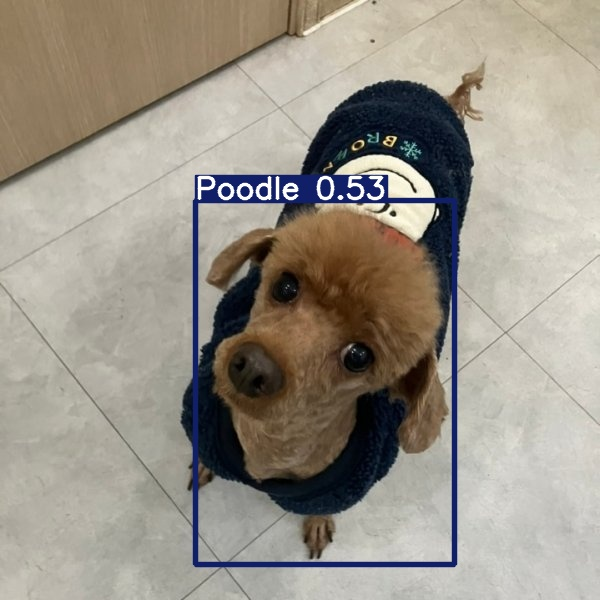

In [19]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/yolov5/runs/detect/exp18/testimage11.jpg')
cv2_imshow(img)

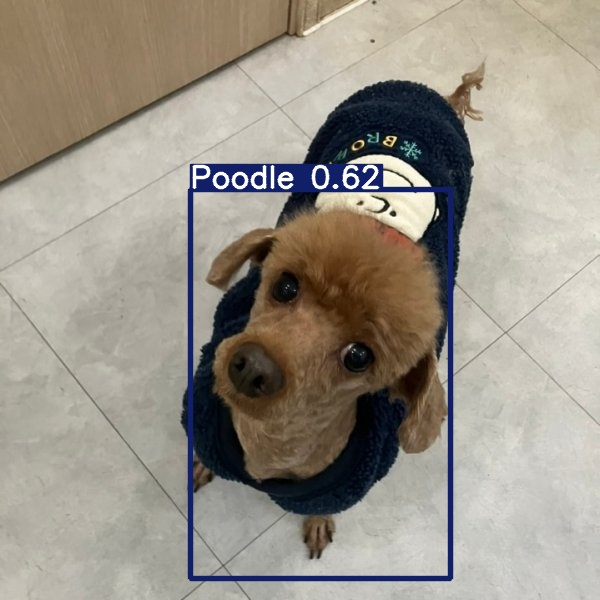

In [20]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/yolov5/runs/detect/exp19/testimage11.jpg')
cv2_imshow(img)

In [21]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_1/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/testimage/testimage12.jpg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_1/weights/best.pt'], source=/content/drive/MyDrive/testimage/testimage12.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/testimage/testimage12.jpg: 512x640 1 Poodle, 48.9ms
Speed: 0.7ms pre-process, 48.9ms inference, 514.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp20


In [22]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_2/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/testimage/testimage12.jpg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_2/weights/best.pt'], source=/content/drive/MyDrive/testimage/testimage12.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/testimage/testimage12.jpg: 512x640 1 Poodle, 51.9ms
Speed: 0.6ms pre-process, 51.9ms inference, 639.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp

In [23]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_3/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/testimage/testimage12.jpg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_3/weights/best.pt'], source=/content/drive/MyDrive/testimage/testimage12.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/testimage/testimage12.jpg: 512x640 1 Poodle, 50.6ms
Speed: 0.6ms pre-process, 50.6ms inference, 673.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp

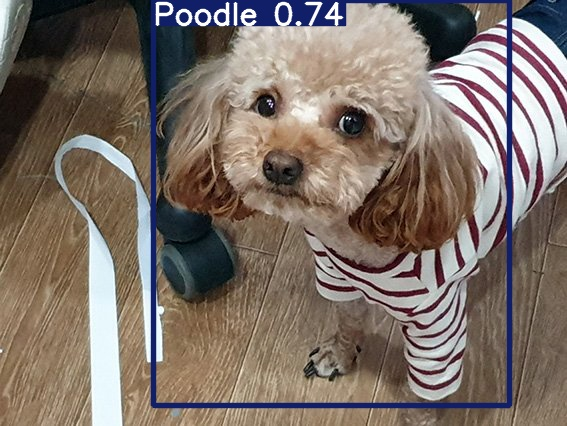

In [24]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/yolov5/runs/detect/exp20/testimage12.jpg')
cv2_imshow(img)

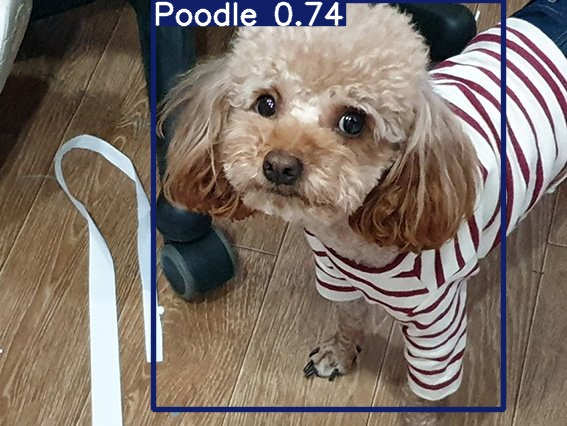

In [25]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/yolov5/runs/detect/exp21/testimage12.jpg')
cv2_imshow(img)

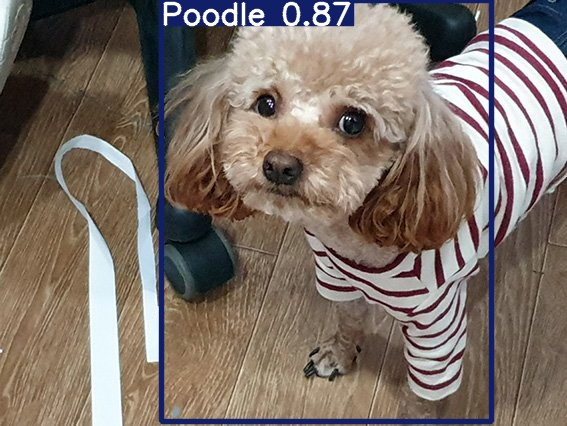

In [26]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/yolov5/runs/detect/exp22/testimage12.jpg')
cv2_imshow(img)

In [31]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_1/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/testimage/testimage6.jpeg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_1/weights/best.pt'], source=/content/drive/MyDrive/testimage/testimage6.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/testimage/testimage6.jpeg: 640x384 1 Chihuahua, 50.7ms
Speed: 0.5ms pre-process, 50.7ms inference, 583.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/

In [29]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_3/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/testimage/testimage6.jpeg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_3/weights/best.pt'], source=/content/drive/MyDrive/testimage/testimage6.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/testimage/testimage6.jpeg: 640x384 1 Chihuahua, 50.7ms
Speed: 0.7ms pre-process, 50.7ms inference, 571.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/

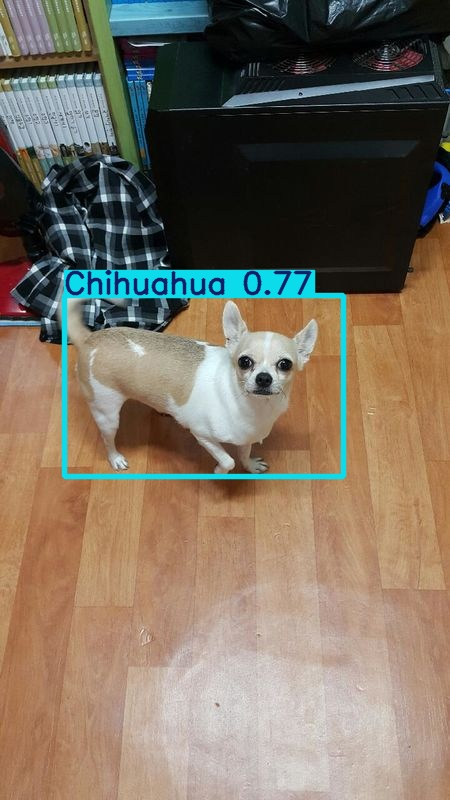

In [32]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/yolov5/runs/detect/exp27/testimage6.jpeg')
cv2_imshow(img)

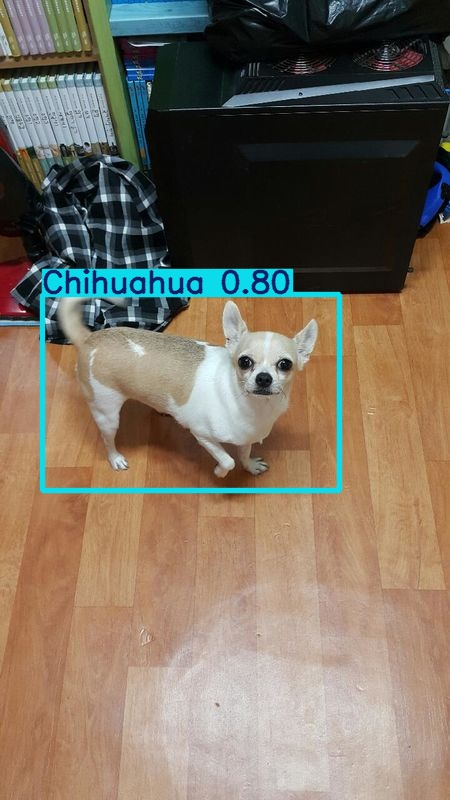

In [33]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/yolov5/runs/detect/exp25/testimage6.jpeg')
cv2_imshow(img)

In [34]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_1/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/testimage/testimage5.jpeg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_1/weights/best.pt'], source=/content/drive/MyDrive/testimage/testimage5.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/testimage/testimage5.jpeg: 640x320 (no detections), 53.7ms
Speed: 0.6ms pre-process, 53.7ms inference, 8.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp28


In [35]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_2/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/testimage/testimage5.jpeg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_2/weights/best.pt'], source=/content/drive/MyDrive/testimage/testimage5.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/testimage/testimage5.jpeg: 640x320 1 Maltese, 84.5ms
Speed: 0.7ms pre-process, 84.5ms inference, 905.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/ex

In [37]:
!python /content/drive/MyDrive/yolov5/detect.py --weights /content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_3/weights/best.pt --img 640 --conf 0.5 --source /content/drive/MyDrive/testimage/testimage5.jpeg

detect: weights=['/content/drive/MyDrive/yolov5/runs/train/dog_breeds_training_3/weights/best.pt'], source=/content/drive/MyDrive/testimage/testimage5.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-321-g3742ab49 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/testimage/testimage5.jpeg: 640x320 (no detections), 50.1ms
Speed: 0.5ms pre-process, 50.1ms inference, 13.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp31
